# Linear Regression on Swedish Auto Insurance Dataset
Auto Insurance in Sweden  

In the following data  
X = number of claims  
Y = total payment for all the claims in thousands of Swedish Kronor  
for geographical zones in Sweden  
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance  
http://college.hmco.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html  

Credits: some materials are borrowed from the following resources
1. https://github.com/RishiSD/Linear-regression-on-Swedish-Auto-Insurance-dataset/blob/master/Swedish%20Auto%20Insurance.ipynb

## Step1: Reading data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
df = pd.read_csv('dataset/AutoInsurSweden.txt', sep='\t', skiprows=10, decimal=',')
#df = pd.read_csv('dataset/AutoInsurSweden.txt', sep='\t', skiprows=10)

In [3]:
# let print df or df.head()
df['Y']

0     392.5
1      46.2
2      15.7
3     422.2
4     119.4
5     170.9
6      56.9
7      77.5
8     214.0
9      65.3
10     20.9
11    248.1
12     23.5
13     39.6
14     48.8
15      6.6
16    134.9
17     50.9
18      4.4
19    113.0
20     14.8
21     48.7
22     52.1
23     13.2
24    103.9
25     77.5
26     11.8
27     98.1
28     27.9
29     38.1
      ...  
33     40.3
34    161.5
35     57.2
36    217.6
37     58.1
38     12.6
39     59.6
40     89.9
41    202.4
42    181.3
43    152.8
44    162.8
45     73.4
46     21.3
47     92.6
48     76.1
49     39.9
50    142.1
51     93.0
52     31.9
53     32.1
54     55.6
55    133.3
56    194.5
57    137.9
58     87.4
59    209.8
60     95.5
61    244.6
62    187.5
Name: Y, Length: 63, dtype: float64

In [4]:
df[['X', 'Y']] = df[['X', 'Y']].astype('float32')

In [5]:
# Displaying basic stats for the columns
df.describe(include='all')

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351944,87.327553
min,0.000000,0.000000
25%,7.500000,38.849998
50%,14.000000,73.400002
75%,29.000000,140.000000
max,124.000000,422.200012


## Visualization using seaborn and matplotlib
Plotting the distribution of the feature and label from the Dataset.

We can see that the distributions have approximately the same shape which indicates that there is a strong linear relationship between the feature and label.

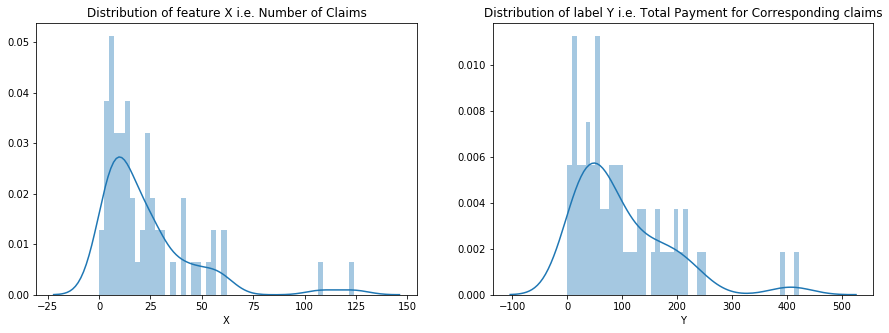

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(df.X,bins=50,ax=ax1)

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(df.Y,bins=50,ax=ax2)

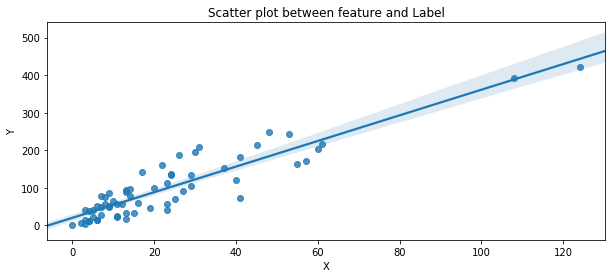

In [7]:
# This displays the scatter plot for Feature and Label and fits an approximate regression line for the same.
fig , (ax1) = plt.subplots(1,1,figsize=(10,4))

ax1.set_title('Scatter plot between feature and Label')
sns.regplot(data=df,x='X',y='Y',ax=ax1)

## Step 2: Create Dataset and iterator

In [8]:
import tensorflow as tf

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((df['X'], df['Y']))

In [10]:
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.float32, tf.float32)>

In [11]:
iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

In [12]:
# Let check if the iterator work
with tf.Session() as sess:
    sess.run(iterator.initializer) # initialize the iterator
    for i in range(10):
        x, y = sess.run((X,Y))
        print(x, y)

108.0 392.5
19.0 46.2
13.0 15.7
124.0 422.2
40.0 119.4
57.0 170.9
23.0 56.9
14.0 77.5
45.0 214.0
10.0 65.3


## Step 3: create weight and bias, initialized to 0

In [15]:
# Y_predicted = w * X + b
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')
#w = tf.get_variable('weights', initializer=tf.constant(0.1))
#b = tf.get_variable('bias', initializer=tf.constant(0.1))

## Step 4: build model to predict Y

In [16]:
Y_predicted = w * X + b

## Step 5: use the square error as the loss function

In [17]:
loss = tf.square(Y - Y_predicted, name='loss')

## Step 6: using gradient descent with learning rate of 0.001 to minimize loss

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(loss)

In [19]:
import time
start = time.time()
n_samples = len(df)
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    # Step 8: train the model for 100 epochs
    for i in range(100):
        # initialize the iterator
        sess.run(iterator.initializer)
        writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
        total_loss = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss]) 
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
            
        print('Epoch {0}: {1} - {2}'.format(i, total_loss, total_loss/n_samples))

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b]) 
    print('w: %f, b: %f' %(w_out, b_out))
print('Took: %f seconds' %(time.time() - start))


Epoch 0: 825620.9191849399 - 13105.093955316506
Epoch 1: 191920.27215816826 - 3046.353526320131
Epoch 2: 191744.97201049328 - 3043.570984293544
Epoch 3: 191528.2092331946 - 3040.130305288803
Epoch 4: 191312.87791639566 - 3036.7123478792964
Epoch 5: 191098.75547397137 - 3033.3135789519265
Epoch 6: 190886.17524975538 - 3029.9392896786567
Epoch 7: 190675.28595614433 - 3026.5918405737198
Epoch 8: 190465.55950009823 - 3023.2628492079084
Epoch 9: 190257.2853642702 - 3019.9569105439714
Epoch 10: 190050.49710786343 - 3016.674557267673
Epoch 11: 189845.04728400707 - 3013.413448952493
Epoch 12: 189640.9791945219 - 3010.174272928919
Epoch 13: 189438.21234226227 - 3006.9557514644803
Epoch 14: 189236.7552512884 - 3003.7580198617206
Epoch 15: 189036.81510794163 - 3000.5843667927243
Epoch 16: 188837.98901093006 - 2997.4283969988896
Epoch 17: 188640.79841017723 - 2994.2983874631304
Epoch 18: 188444.78146076202 - 2991.187007313683
Epoch 19: 188250.0099990368 - 2988.0953968101076
Epoch 20: 188056.642280

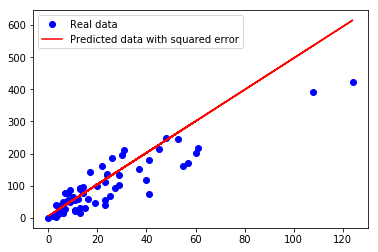

In [20]:
# plot the results
plt.plot(df['X'], df['Y'], 'bo', label='Real data')
plt.plot(df['X'], df['X'] * w_out + b_out, 'r', label='Predicted data with squared error')
plt.legend()
plt.show()